<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/main/JPMorganPrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing

In [242]:
import numpy as np
import pandas as pd
import matplotlib
import yfinance as yf
import os
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly

import pandas_datareader.data as web; yf.pdr_override()

In [243]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector


remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

print(len(symbols))

symbol_industry = dict(zip(symbols,industries))
print(len(symbol_industry))

499
499


In [244]:
# old day 2023-02-02
# old end 2023-03-21
start_date = '2022-01-01'
end_date  = '2022-12-31'

data_dir = '/data/'

In [245]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
    #import in above cell
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates] #strptime takes in date and format

In [246]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.makedirs(data_dir, exist_ok=True)

In [247]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)')



Error for BIIB
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*****************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [248]:
df.drop(columns='Volume')

,Adj Close
Date,
2022-01-03,230.225357
2022-01-04,221.460205
2022-01-05,213.039352
2022-01-06,213.885391
2022-01-07,207.658310
...,...
2022-12-23,144.442413
2022-12-27,143.986588
2022-12-28,142.529877


In [249]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes

# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']

In [250]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)

In [251]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03,154.596817,18.750000,179.953873,125.280708,172.679993,134.063431,44.549999,395.446625,564.369995,171.413132,...,87.340073,64.450027,59.097820,55.447811,114.280243,132.103195,123.620811,583.900024,59.537769,230.225357
2022-01-04,149.370483,19.020000,177.669998,125.040184,170.800003,130.910492,45.130001,392.620728,554.000000,169.864975,...,87.061440,64.857948,61.320732,55.730461,115.492546,132.809540,124.874916,587.599976,61.233826,221.460205
2022-01-05,146.811661,18.680000,172.943970,125.697021,162.250000,130.322296,44.599998,385.706360,514.429993,167.242706,...,83.837318,65.493530,62.083405,54.833782,113.918488,131.125961,124.463264,558.179993,61.372841,213.039352
2022-01-06,147.325363,18.570000,170.056976,125.104912,159.750000,130.303024,44.860001,367.080444,514.119995,167.774918,...,84.225403,64.981262,63.543640,54.794796,113.762070,132.480576,123.429344,555.159973,63.893742,213.885391
2022-01-07,143.403168,19.280001,170.225037,124.781136,166.050003,130.708008,45.070000,360.039886,510.700012,163.372253,...,84.135841,65.550438,64.064484,54.970238,112.852837,130.961502,122.682594,530.859985,64.959564,207.658310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.183121,12.710000,131.127060,156.766922,85.250000,106.058311,63.380001,261.928528,338.450012,161.535767,...,80.324600,68.689728,105.091942,31.343016,108.675713,127.117897,125.965240,248.220001,46.140099,144.442413
2022-12-27,148.500870,12.530000,129.307236,156.661194,83.489998,106.440666,63.619999,261.160706,335.089996,159.918823,...,83.916924,69.309517,106.552094,31.579344,109.656204,128.104050,126.551865,251.000000,46.511501,143.986588
2022-12-28,147.051117,12.320000,125.339417,155.930710,82.489998,105.715179,62.599998,259.005005,328.329987,158.025833,...,79.697693,68.810287,104.801842,30.506023,107.893311,127.522232,125.269234,246.839996,45.682980,142.529877
2022-12-29,150.030060,12.700000,128.889572,156.247910,85.230003,108.146538,63.110001,264.182709,337.579987,161.673813,...,80.861961,69.297821,105.594772,31.914906,110.567368,128.192825,127.098717,257.529999,46.740059,146.810806


In [252]:
df_pct = df_price.pct_change()[1:]
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012691,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009800,0.012437,-0.016090,-0.013629,-0.012677,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004711,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023521,-0.000711,-0.001373,0.010331,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011466,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009239,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001477,0.011943,-0.002798,-0.001041,0.004477,0.001388,0.008433,0.005023,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000729,0.000621,0.001106,0.002869,0.003521,0.005034
2022-12-27,0.002144,-0.014162,-0.013878,-0.000674,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008049,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008254,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [253]:
df_pct = df_pct.dropna(how='all')

- current objects i have df, df_price, df_pct

In [254]:
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012691,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009800,0.012437,-0.016090,-0.013629,-0.012677,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004711,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023521,-0.000711,-0.001373,0.010331,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011466,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009239,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001477,0.011943,-0.002798,-0.001041,0.004477,0.001388,0.008433,0.005023,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000729,0.000621,0.001106,0.002869,0.003521,0.005034
2022-12-27,0.002144,-0.014162,-0.013878,-0.000674,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008049,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008254,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [255]:
# Convert index to datetime if it's in string format
df_pct.index = pd.to_datetime(df_pct.index)

# Create a new DataFrame with the desired structure
new_df = pd.DataFrame(index=[f'{company} Week {week}' for company in df_pct for week in range(1, 53)],
                      columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through rows of the original DataFrame and fill the new DataFrame
for i, row in df_pct.iterrows():
    week = i.week
    day = i.dayofweek

    for column_name in df_pct.columns:
      new_df.at[f'{column_name} Week {week}', f'Day {day + 1}'] = row[column_name]

# Display the new DataFrame
pct = new_df
pct


,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,NaN,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,NaN,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013124,-0.00189,0.042543,0.016219,0.00498
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [256]:
pct = pct.fillna(0)

In [257]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013124,-0.001890,0.042543,0.016219,0.004980
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


### Begin prediction

In [258]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013124,-0.001890,0.042543,0.016219,0.004980
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [259]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
pct_drop = pct

y = pct_drop["Day 5"]
X = pct_drop.drop("Day 5", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize
model = XGBRegressor(objective='reg:squarederror', random_state=1234)
# Train
model.fit(X_train, y_train)
# Create Predictions
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

pred_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
pred_df

Mean Squared Error: 0.0005699877627549588


,Actual Prices,Predicted Prices
CHRW Week 32,-0.001277,0.007877
AXP Week 13,0.000909,0.001786
WMT Week 48,-0.000978,0.000759
NEM Week 29,-0.013438,-0.005734
BAX Week 47,-0.005329,0.005015
...,...,...
PH Week 4,-0.000389,0.001203
WDC Week 38,0.000591,-0.001644
AON Week 6,-0.013436,-0.004386
URI Week 28,0.013318,-0.000277


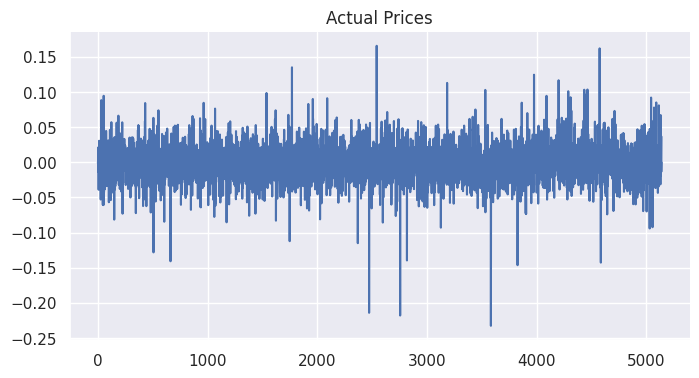

In [260]:
from matplotlib import pyplot as plt
_df_32['Actual Prices'].plot(kind='line', figsize=(8, 4), title='Actual Prices')
plt.gca().spines[['top', 'right']].set_visible(False)

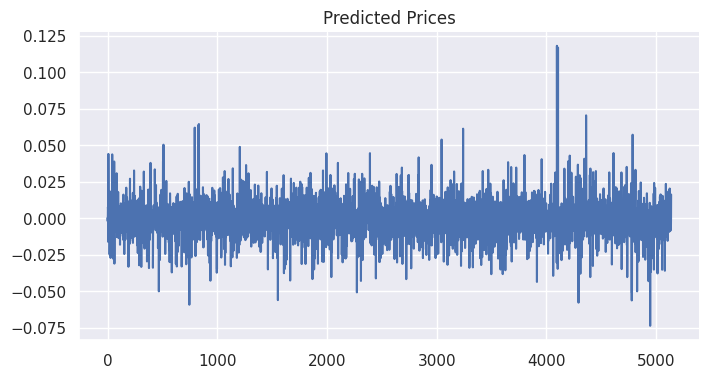

In [261]:
from matplotlib import pyplot as plt
_df_33['Predicted Prices'].plot(kind='line', figsize=(8, 4), title='Predicted Prices')
plt.gca().spines[['top', 'right']].set_visible(False)

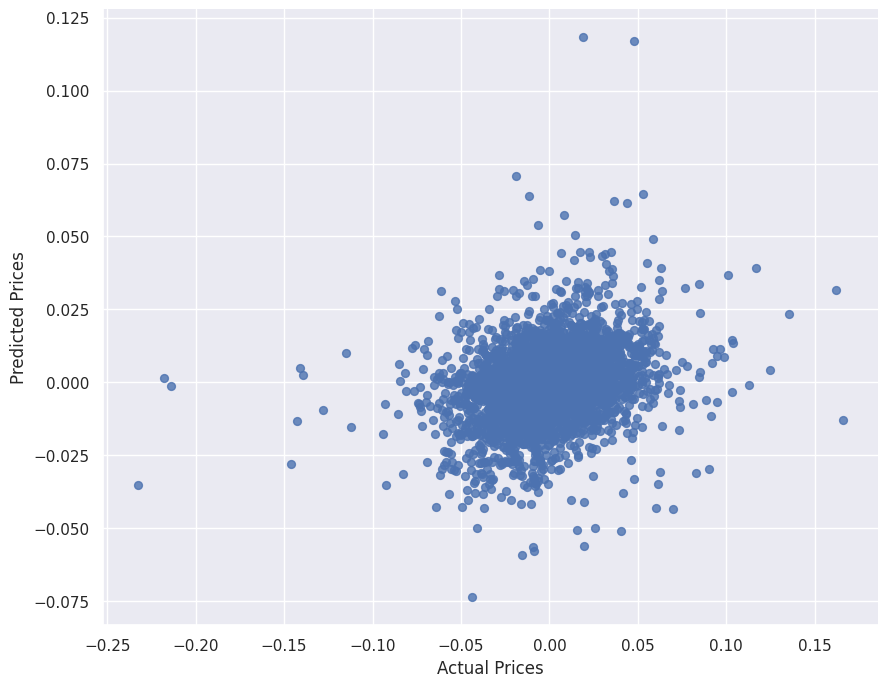

In [262]:
from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Actual Prices', y='Predicted Prices', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Graph

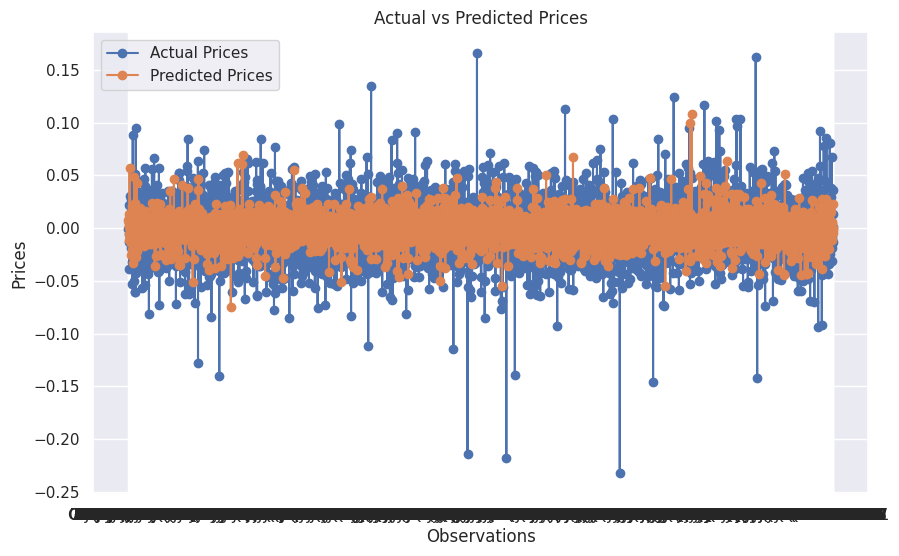

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Plot the actual prices
plt.plot(pred_df['Actual Prices'], label='Actual Prices', marker='o')

# Plot the predicted prices
plt.plot(pred_df['Predicted Prices'], label='Predicted Prices', marker='o')

# Set labels and title
plt.xlabel('Observations')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [264]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013124,-0.001890,0.042543,0.016219,0.004980
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [265]:
n = 52
companies = {}

for i in range(0, len(pct), n):
    # Extract 52 rows for the current iteration
    df_iteration = pct.iloc[i:i + n]

    # Get the corresponding symbol for the dataframe
    symbol = symbols[i // n]  # Integer division to get the index of the symbol

    # Add the dataframe to the dictionary with the symbol as the key
    companies[symbol] = df_iteration



In [266]:
companies['A']

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025779,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.013820
A Week 8,0.000000,-0.011814,-0.034409,0.017063,0.043543
A Week 9,-0.025200,0.012044,0.009323,0.030114,-0.023912
A Week 10,-0.026514,-0.007826,0.030467,0.008029,-0.029926


In [287]:
# Dictionary that will hold mse values
mse_dict = {name: None for name in symbols}
mse_dict

{'A': None,
 'AAL': None,
 'AAPL': None,
 'ABBV': None,
 'ABNB': None,
 'ABT': None,
 'ACGL': None,
 'ACN': None,
 'ADBE': None,
 'ADI': None,
 'ADM': None,
 'ADP': None,
 'ADSK': None,
 'AEE': None,
 'AEP': None,
 'AES': None,
 'AFL': None,
 'AIG': None,
 'AIZ': None,
 'AJG': None,
 'AKAM': None,
 'ALB': None,
 'ALGN': None,
 'ALK': None,
 'ALL': None,
 'ALLE': None,
 'AMAT': None,
 'AMCR': None,
 'AMD': None,
 'AME': None,
 'AMGN': None,
 'AMP': None,
 'AMT': None,
 'AMZN': None,
 'ANET': None,
 'ANSS': None,
 'AON': None,
 'AOS': None,
 'APA': None,
 'APD': None,
 'APH': None,
 'APTV': None,
 'ARE': None,
 'ATO': None,
 'AVB': None,
 'AVGO': None,
 'AVY': None,
 'AWK': None,
 'AXON': None,
 'AXP': None,
 'AZO': None,
 'BA': None,
 'BAC': None,
 'BALL': None,
 'BAX': None,
 'BBWI': None,
 'BBY': None,
 'BDX': None,
 'BEN': None,
 'BF.B': None,
 'BIIB': None,
 'BIO': None,
 'BK': None,
 'BKNG': None,
 'BKR': None,
 'BLK': None,
 'BMY': None,
 'BR': None,
 'BRO': None,
 'BSX': None,
 '

In [288]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Create a dictionary to store predicted vs actual values
predictions_dict = {}

# Hyperparameters for the XGBoost model (you can adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1
}

# Iterate through the dictionary of dataframes
for symbol, df in companies.items():

    X_new = df.drop('Day 5', axis=1)
    y_new = df['Day 5']
    X_train_new, X_test_new, y_train_new, y_test_new  = train_test_split(X_new, y_new, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train_new, y_train_new)
    # Create Predictions

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    predictions = model.predict(X_test_new)

    # Calculate the MSE values
    mse_new = mean_squared_error(y_test_new, predictions)
    mse_dict[symbol] = mse_new

    #print(f'Mean Squared Error: {mse_new}')


    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_test_new, 'Predicted': predictions})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_dict[symbol] = pred_df_new

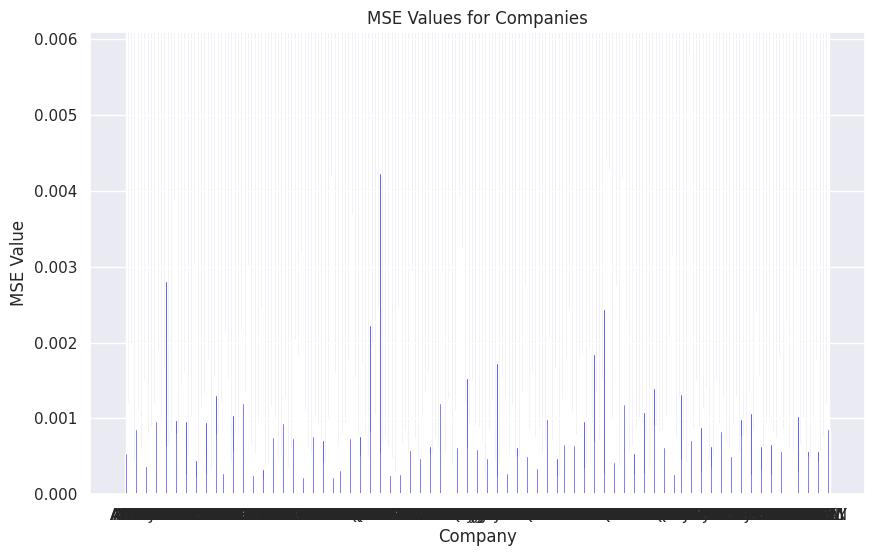

In [296]:
# Extract keys (company names) and values (MSE values) from the dictionary
companies = list(mse_dict.keys())

# Cast values to float, handling None values
mse_dict = {key: float(value) if value is not None else None for key, value in mse_dict.items()}
mse_values_list = list(filter(None, mse_dict.values()))

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(companies[:len(mse_values_list)], mse_values_list, color='blue')  # Trim companies to match filtered values
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Values for Companies')
plt.show()


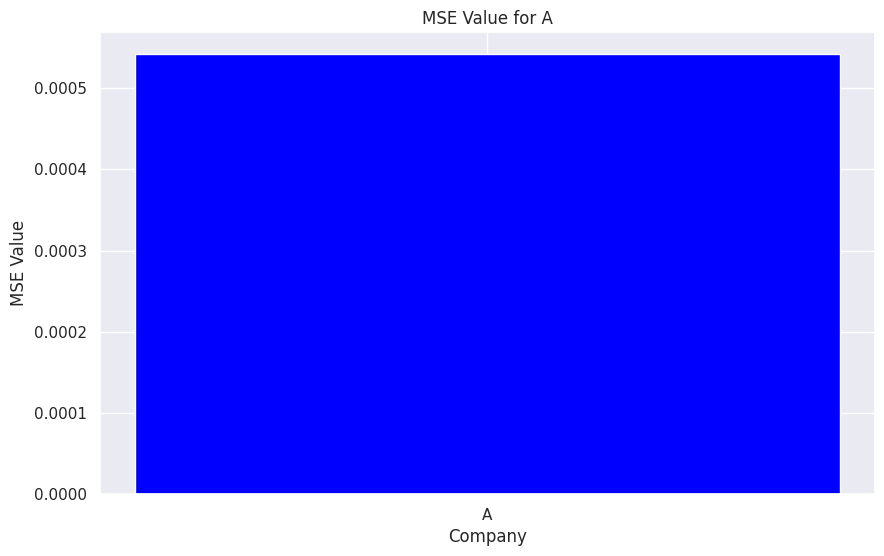

In [297]:
A_plot = mse_dict.get('A')
plt.figure(figsize=(10, 6))
plt.bar('A', A_plot, color='blue')  # Trim companies to match filtered values
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Value for A')
plt.show()

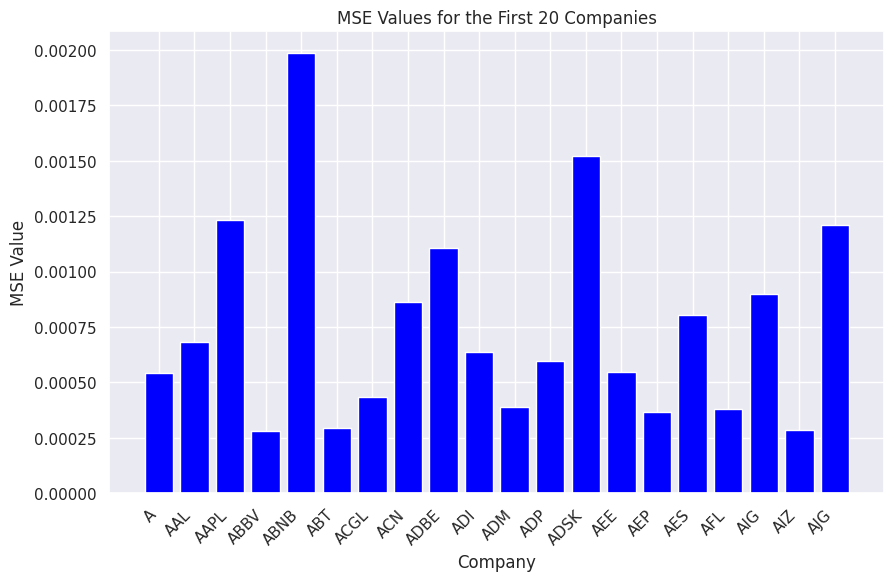

In [298]:
# Extract the first 20 companies and their MSE values
companies_to_plot = list(mse_dict.keys())[:20]
mse_values_to_plot = [mse_dict[company] for company in companies_to_plot]

# Plotting the MSE values for the first 20 companies
plt.figure(figsize=(10, 6))
plt.bar(companies_to_plot, mse_values_to_plot, color='blue')
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Values for the First 20 Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [273]:
predictions_dict['AAL']

,Actual,Predicted
AAL Week 41,0.004598,-0.017271
AAL Week 28,0.015439,0.000384
AAL Week 40,-0.043205,0.008855
AAL Week 45,-0.003349,0.004135
AAL Week 7,-0.019210,-0.004552
AAL Week 47,0.005548,-0.018431
AAL Week 14,-0.021239,-0.028124
AAL Week 9,-0.071292,-0.026601
AAL Week 50,-0.009281,-0.024501
AAL Week 32,0.017345,-0.013422


from matplotlib import pyplot as plt
_df_34['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

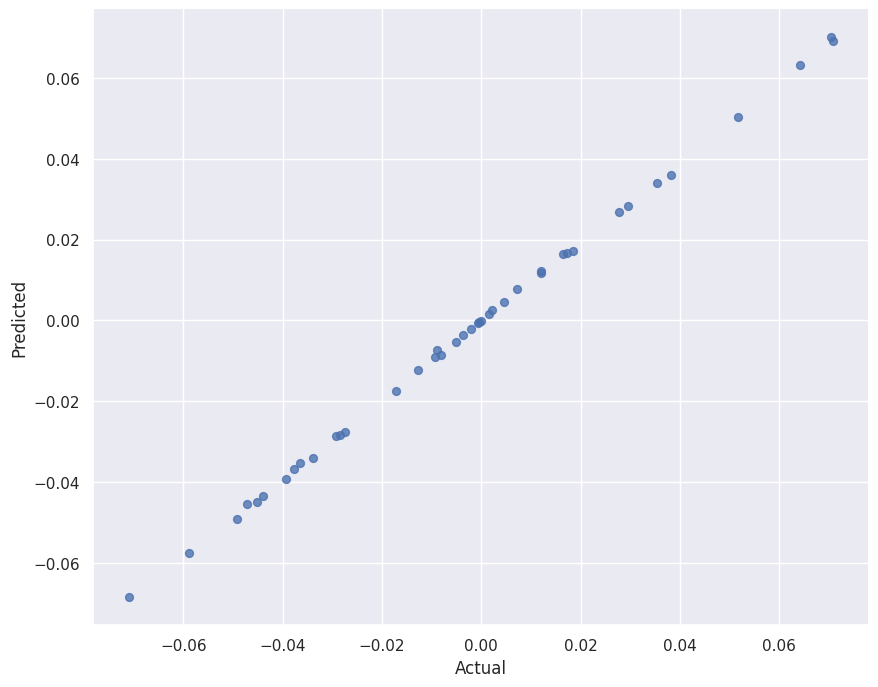

In [274]:
from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

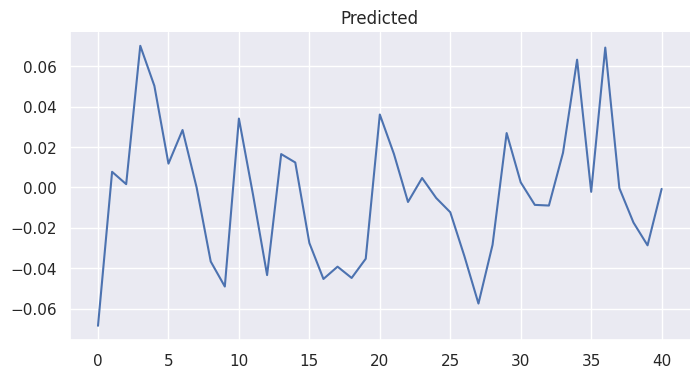

In [275]:
from matplotlib import pyplot as plt
_df_28['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

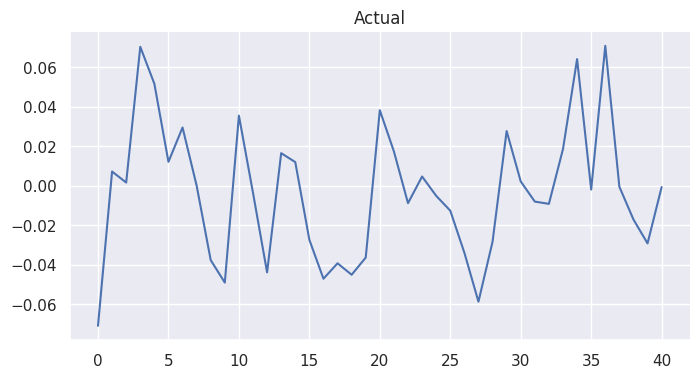

In [276]:
from matplotlib import pyplot as plt
_df_27['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [277]:
predictions_dict['ANET']

,Actual,Predicted
ANET Week 41,-0.034068,-0.003152
ANET Week 28,0.025933,-0.009018
ANET Week 40,-0.045037,-0.009994
ANET Week 45,0.012364,-0.014671
ANET Week 7,-0.025613,0.019257
ANET Week 47,-0.010424,-0.013193
ANET Week 14,-0.013477,-0.015563
ANET Week 9,-0.014874,-0.028419
ANET Week 50,-0.015289,0.039826
ANET Week 32,0.006586,-0.002733


### Training Based on Clustering

In [278]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013124,-0.001890,0.042543,0.016219,0.004980
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [279]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03,154.596817,18.750000,179.953873,125.280708,172.679993,134.063431,44.549999,395.446625,564.369995,171.413132,...,87.340073,64.450027,59.097820,55.447811,114.280243,132.103195,123.620811,583.900024,59.537769,230.225357
2022-01-04,149.370483,19.020000,177.669998,125.040184,170.800003,130.910492,45.130001,392.620728,554.000000,169.864975,...,87.061440,64.857948,61.320732,55.730461,115.492546,132.809540,124.874916,587.599976,61.233826,221.460205
2022-01-05,146.811661,18.680000,172.943970,125.697021,162.250000,130.322296,44.599998,385.706360,514.429993,167.242706,...,83.837318,65.493530,62.083405,54.833782,113.918488,131.125961,124.463264,558.179993,61.372841,213.039352
2022-01-06,147.325363,18.570000,170.056976,125.104912,159.750000,130.303024,44.860001,367.080444,514.119995,167.774918,...,84.225403,64.981262,63.543640,54.794796,113.762070,132.480576,123.429344,555.159973,63.893742,213.885391
2022-01-07,143.403168,19.280001,170.225037,124.781136,166.050003,130.708008,45.070000,360.039886,510.700012,163.372253,...,84.135841,65.550438,64.064484,54.970238,112.852837,130.961502,122.682594,530.859985,64.959564,207.658310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.183121,12.710000,131.127060,156.766922,85.250000,106.058311,63.380001,261.928528,338.450012,161.535767,...,80.324600,68.689728,105.091942,31.343016,108.675713,127.117897,125.965240,248.220001,46.140099,144.442413
2022-12-27,148.500870,12.530000,129.307236,156.661194,83.489998,106.440666,63.619999,261.160706,335.089996,159.918823,...,83.916924,69.309517,106.552094,31.579344,109.656204,128.104050,126.551865,251.000000,46.511501,143.986588
2022-12-28,147.051117,12.320000,125.339417,155.930710,82.489998,105.715179,62.599998,259.005005,328.329987,158.025833,...,79.697693,68.810287,104.801842,30.506023,107.893311,127.522232,125.269234,246.839996,45.682980,142.529877
2022-12-29,150.030060,12.700000,128.889572,156.247910,85.230003,108.146538,63.110001,264.182709,337.579987,161.673813,...,80.861961,69.297821,105.594772,31.914906,110.567368,128.192825,127.098717,257.529999,46.740059,146.810806


In [280]:
df_industry = pd.DataFrame({"Sectors": industries, "Company": symbols})


In [281]:
df_industry

,Sectors,Company
0,Industrials,A
1,Industrials,AAL
2,Health Care,AAPL
3,Health Care,ABBV
4,Information Technology,ABNB
...,...,...
494,Consumer Discretionary,YUM
495,Information Technology,ZBH
496,Health Care,ZBRA
497,Financials,ZION


In [282]:
sectors_to_append = {sector: pd.DataFrame() for sector in df_industry['Sectors'].unique()}

# Iterate through rows to figure out if the sectors match the name
for _, company in df_industry.iterrows():
    company_name = company['Company']
    company_sector = company['Sectors']

    # Check if the company exists in the df_price DataFrame
    if company_name in df_price.columns and company_sector in sectors_to_append:
        sectors_to_append[company_sector][company_name] = df_price[company_name]

In [283]:
sectors_to_append['Communication Services']

,AIZ,AVGO,CMI,CTAS,EBAY,ES,GM,GNRC,JKHY,LYV,...,MOH,NKE,NOW,NRG,OTIS,PEAK,TECH,TER,VRSK,WEC
2022-01-03,151.095963,631.239746,209.328445,415.411621,64.459435,84.064903,60.421677,347.910004,168.009521,121.139999,...,316.570007,161.382095,630.140015,39.773590,83.044632,32.716652,120.985359,164.854782,219.059250,89.995804
2022-01-04,152.517288,638.472229,217.319046,416.410706,62.857590,83.366959,64.935776,332.079987,171.105194,120.720001,...,303.940002,163.067749,603.940002,39.458805,83.675446,33.196583,116.081856,165.122742,219.128403,89.771027
2022-01-05,151.134628,611.902466,216.403625,397.672241,62.230373,84.159225,61.972473,312.089996,169.400620,117.470001,...,302.209991,159.010391,572.760010,38.347816,81.355980,32.598930,107.825020,159.039047,211.795471,90.810623
2022-01-06,150.670532,606.221191,219.493088,394.753174,64.469078,83.847984,62.100880,317.390015,166.148193,119.339996,...,291.769989,157.824554,574.039978,37.625671,82.210007,32.562706,105.793671,162.244659,210.174713,90.239319
2022-01-07,153.484192,589.205994,223.459763,389.287384,63.996258,84.564789,61.508221,316.549988,166.295135,115.860001,...,289.769989,153.835831,566.390015,37.551601,81.870338,32.571762,103.000885,157.074036,204.225327,91.044769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,123.035263,542.620422,236.293518,452.564697,39.492306,81.847137,33.566921,92.190002,175.555267,70.690002,...,335.079987,115.152924,381.859985,30.611338,77.149109,23.779388,82.369179,86.286476,174.763290,92.162750
2022-12-27,122.582603,543.710693,239.065262,454.336426,39.403828,82.566193,33.060883,91.150002,177.099564,69.589996,...,334.369995,116.450554,380.640015,30.927910,77.296791,23.911652,81.851448,84.492165,174.713531,92.674332
2022-12-28,121.982330,535.214294,236.332703,446.428131,39.246525,81.895721,32.277031,96.239998,174.862305,68.160004,...,332.420013,113.894913,376.049988,30.563374,76.203949,23.344801,80.338081,83.973801,173.389923,91.766983
2022-12-29,124.609734,547.904907,236.753845,452.277679,41.114471,82.673088,33.408161,100.639999,175.703751,70.150002,...,333.269989,116.242538,389.850006,31.081396,77.848145,23.807732,84.101585,87.213531,177.201462,92.095184


In [284]:
sectors_to_append['Utilities']

,ACN,AIG,ALK,ALLE,AME,AVY,CLX,CRM,CTVA,CVX,...,NTRS,NXPI,PHM,PM,POOL,PTC,SNPS,STX,WHR,XRAY
2022-01-03,395.446625,55.044086,54.070000,126.245659,141.971252,204.683456,164.167786,255.460007,46.047916,110.761490,...,113.984535,222.986481,54.921619,87.197830,537.966614,122.980003,361.100006,104.939720,211.356262,55.447811
2022-01-04,392.620728,56.588280,55.450001,129.212463,144.362656,209.644958,164.787170,248.229996,46.902103,112.776840,...,118.309723,224.577698,55.724537,87.753471,537.614624,122.599998,352.989990,107.591949,217.505280,55.730461
2022-01-05,385.706360,55.811386,54.770000,126.196877,141.734100,207.761322,166.513962,227.669998,46.381733,113.510559,...,117.507004,216.573273,54.941200,87.398232,517.562439,118.330002,339.769989,106.377121,214.026596,54.833782
2022-01-06,367.080444,56.770504,54.459999,124.986725,143.433777,207.790466,167.555664,229.149994,47.029747,114.476448,...,118.970779,218.878174,53.883698,88.728111,508.900269,117.139999,344.970001,104.216377,212.309952,54.794796
2022-01-07,360.039886,58.257156,55.860001,123.581390,140.696533,207.042847,168.832001,228.309998,47.540287,116.120308,...,122.446030,213.448654,51.190975,90.303917,491.937561,115.080002,330.359985,102.899536,206.215378,54.970238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,261.928528,61.964111,43.310001,103.743423,138.672256,178.714020,139.473404,129.440002,58.890564,170.693298,...,85.605179,155.139694,45.467533,97.644424,301.863312,121.250000,320.209991,48.871902,134.091461,31.343016
2022-12-27,261.160706,62.130898,42.259998,104.681786,139.418457,179.967239,139.599228,130.660004,59.267422,172.839005,...,85.478760,151.312119,45.546970,98.595039,302.268280,120.620003,317.950012,50.371639,134.157745,31.579344
2022-12-28,259.005005,61.699223,41.299999,103.042114,137.657425,176.710876,137.779694,128.470001,58.146744,170.289185,...,84.661896,149.265503,44.573868,96.924271,292.854828,118.870003,315.309998,49.394390,130.995285,30.506023
2022-12-29,264.182709,62.425217,42.810001,105.432472,139.657227,179.019928,137.837784,132.539993,58.493855,171.578522,...,87.015236,155.582458,45.497322,97.164314,303.167175,121.120003,321.980011,51.300503,135.492767,31.914906


In [302]:
sectors_to_append['Communication Services']

,AIZ,AVGO,CMI,CTAS,EBAY,ES,GM,GNRC,JKHY,LYV,...,MOH,NKE,NOW,NRG,OTIS,PEAK,TECH,TER,VRSK,WEC
2022-01-03,151.095963,631.239746,209.328445,415.411621,64.459435,84.064903,60.421677,347.910004,168.009521,121.139999,...,316.570007,161.382095,630.140015,39.773590,83.044632,32.716652,120.985359,164.854782,219.059250,89.995804
2022-01-04,152.517288,638.472229,217.319046,416.410706,62.857590,83.366959,64.935776,332.079987,171.105194,120.720001,...,303.940002,163.067749,603.940002,39.458805,83.675446,33.196583,116.081856,165.122742,219.128403,89.771027
2022-01-05,151.134628,611.902466,216.403625,397.672241,62.230373,84.159225,61.972473,312.089996,169.400620,117.470001,...,302.209991,159.010391,572.760010,38.347816,81.355980,32.598930,107.825020,159.039047,211.795471,90.810623
2022-01-06,150.670532,606.221191,219.493088,394.753174,64.469078,83.847984,62.100880,317.390015,166.148193,119.339996,...,291.769989,157.824554,574.039978,37.625671,82.210007,32.562706,105.793671,162.244659,210.174713,90.239319
2022-01-07,153.484192,589.205994,223.459763,389.287384,63.996258,84.564789,61.508221,316.549988,166.295135,115.860001,...,289.769989,153.835831,566.390015,37.551601,81.870338,32.571762,103.000885,157.074036,204.225327,91.044769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,123.035263,542.620422,236.293518,452.564697,39.492306,81.847137,33.566921,92.190002,175.555267,70.690002,...,335.079987,115.152924,381.859985,30.611338,77.149109,23.779388,82.369179,86.286476,174.763290,92.162750
2022-12-27,122.582603,543.710693,239.065262,454.336426,39.403828,82.566193,33.060883,91.150002,177.099564,69.589996,...,334.369995,116.450554,380.640015,30.927910,77.296791,23.911652,81.851448,84.492165,174.713531,92.674332
2022-12-28,121.982330,535.214294,236.332703,446.428131,39.246525,81.895721,32.277031,96.239998,174.862305,68.160004,...,332.420013,113.894913,376.049988,30.563374,76.203949,23.344801,80.338081,83.973801,173.389923,91.766983
2022-12-29,124.609734,547.904907,236.753845,452.277679,41.114471,82.673088,33.408161,100.639999,175.703751,70.150002,...,333.269989,116.242538,389.850006,31.081396,77.848145,23.807732,84.101585,87.213531,177.201462,92.095184


In [304]:
import pandas as pd

# Assuming sectors_to_append is a dictionary with sectors as keys and DataFrames as values

# Initialize an empty DataFrame for the final result
sector_df = pd.DataFrame()

# Iterate through sectors and concatenate DataFrames
for sector, df in sectors_to_append.items():
    # Convert index to datetime if it's in string format
    df.index =


ParserError: ignored

In [ ]:
sectors_to_append['Health Care']

In [ ]:
# Create a dictionary to store predicted vs actual values
predictions_sectors = {}

# Hyperparameters for the XGBoost model (you can adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1
}

# Iterate through the dictionary of dataframes
for company, df in sectors_to_append.items():
    # Assuming your target column is named 'target', adjust as needed
    X_sector = df.drop('Day 5', axis=1)
    y_sector = df['Day 5']
    X_train_sector, X_test_sector, y_train_sector, y_test_sector  = train_test_split(X_sector, y_sector, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train_sector, y_train_sector)

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    y_pred_sector = model.predict(X_test_sector)

    mse_sector = mean_squared_error()

    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_train_new, 'Predicted': y_pred_sector})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_sectors[company] = pred_df_new